# Basics of Biostatistic

Topics
1. Population vs Sample
2. Overview of Descriptive and Inferential Statistics
3. Different data types: Continuous, Discrete, Rank/Ordinal and Categorical

We will use the [UCI Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

*   920 patients at risk of coronary diseases in 4 medical centers
*   14 attributes (columns)

In [1]:
# Load the dataset
import pandas as pd
file_path = '/content/heart_disease_uci.csv'
df = pd.read_csv(file_path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Attributes
* id: Unique identifier for each patient
* age: Age of the patient in years
* sex: Sex of the patient (Male/Female)
* dataset: Place of study
* cp (chest pain type): Includes typical angina, atypical angina, non-anginal, asymptomatic
* trestbps (resting blood pressure): Resting blood pressure in mm Hg on admission to the hospital
* chol (serum cholesterol): Serum cholesterol in mg/dl
* fbs (fasting blood sugar): If fasting blood sugar > 120 mg/dl (True/False)
* restecg (resting electrocardiographic results): Includes normal, stt abnormality, lv hypertrophy
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (Categorical, binary: True/False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-3) colored by fluoroscopy
* thal: Includes normal, fixed defect, reversible defect
* num: Diagnosis of heart disease (0-4, 0-no diagnosis, 1-4 different degree of heart disease)




---



## 1. Population vs Sample


In [3]:
# Let's consider the entire dataset as a population
mean_trestbps_whole = df['trestbps'].mean()
print(f"Mean resting blood pressure for the population: {mean_trestbps_whole:.2f} mm Hg")


Mean resting blood pressure for the population: 132.13 mm Hg


In [4]:
# Let's consider the Switzerland sample
df_swiss = df[df['dataset'] == 'Switzerland']
mean_trestbps_swiss = df_swiss['trestbps'].mean()
print(f"Mean resting blood pressure for the Switzerland sample: {mean_trestbps_swiss:.2f} mm Hg")


Mean resting blood pressure for the Switzerland sample: 130.21 mm Hg


---
## 2. Overview of Descriptive and Inferential Statistics





In [11]:
# Descriptive statistics is about summarizing a sample using mean, median
# mode, standard deviation etc.

swiss_sample_summary = df.describe()
swiss_sample_summary

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [19]:
# Inferential statistics is all about deducing whether the observed
# sample value (statistic) would likely occur in the population

# Let's compare cholestrol between patients with and without a diagnosis of
# heart disease in our sample. We will hypthesize that there exists
# no difference (null hypothesis)

from scipy import stats

group1 = df[df['num'] == 0]['chol']  # Patients without a heart disease diagnosis
group1 = group1.dropna() #dropping missing values for now

group2 = df[df['num'] > 0]['chol'] # Patients with a heart disease diagnosis
group2 = group2.dropna() #dropping missing values for now

# t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.6f}, P-value: {p_value:.6f}")

T-statistic: 7.061510, P-value: 0.000000


A low p-value, often below 0.05 indicates that the probability that no difference exists between the two groups is very unlikely. Therefore we should reject our null hypothesis in favor of a alternative hypotheis which states that
the difference between two groups is likely in a broader population.



---



## 3. Types of Data/Measurements

Text(0, 0.5, 'Frequency')

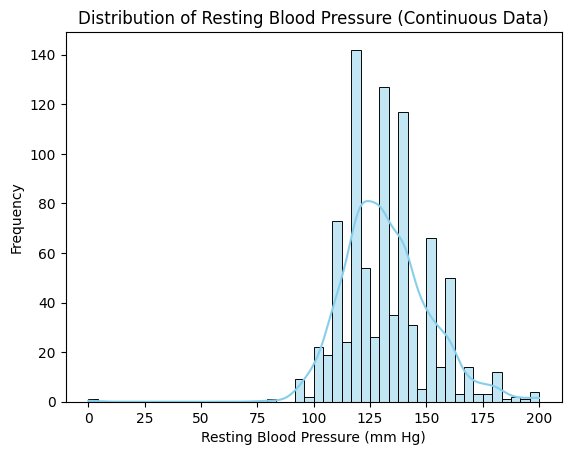

In [26]:
# Continuous: measurements that can vary infinitely between two ranges
# e.g. resting blood pressure (trestbps)
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='trestbps', kde=True, color='skyblue')
plt.title('Distribution of Resting Blood Pressure (Continuous Data)')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')


<ipython-input-27-88645fc4bb6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ca', palette='Set2')


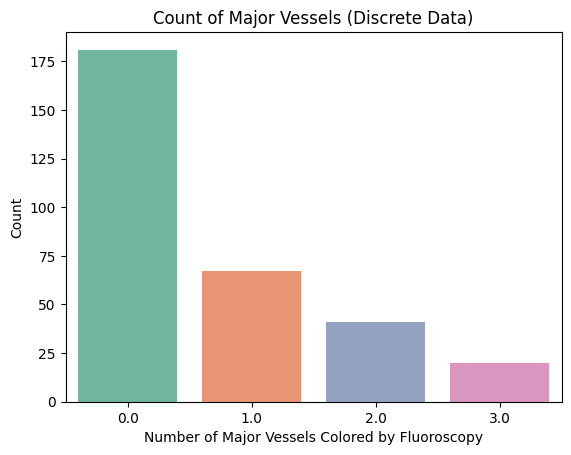

In [27]:
# Discrete: measurements that can take specific values
# e.g. The number of major vessels colred by Fluoroscopy (ca)

sns.countplot(data=df, x='ca', palette='Set2')
plt.title('Count of Major Vessels (Discrete Data)')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')
plt.show()

<ipython-input-31-b4159eac1e99>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='num', palette='Set3', order=sorted(df['num'].unique()))


Text(0, 0.5, 'Count')

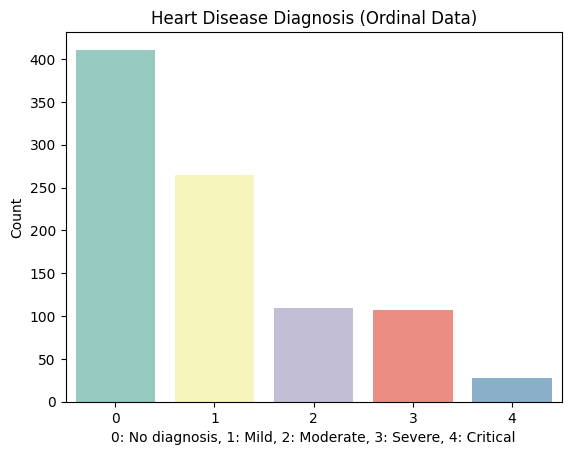

In [31]:
# Ordinal/Rank: measurement categories that have a certain order but the
# differences are not numerically defined
# e.g Diagnosis of heart diesease (num)

sns.countplot(data=df, x='num', palette='Set3', order=sorted(df['num'].unique()))
plt.title('Heart Disease Diagnosis (Ordinal Data)')
plt.xlabel('0: No diagnosis, 1: Mild, 2: Moderate, 3: Severe, 4: Critical')
plt.ylabel('Count')

<ipython-input-32-45b9e40a031f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='Set1')


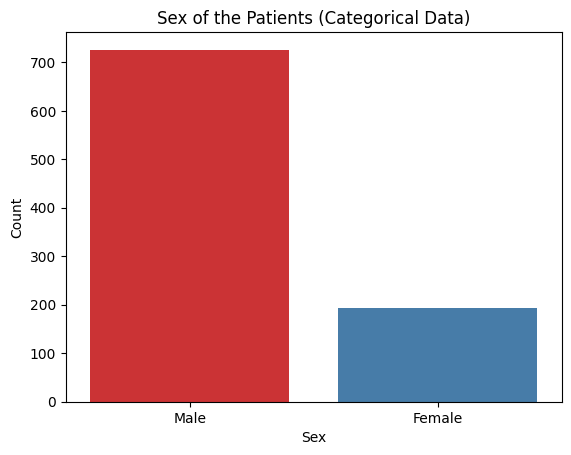

In [32]:
# Categorical: data with categories without any order
# e.g. sex of the patients (sex)

sns.countplot(data=df, x='sex', palette='Set1')
plt.title('Sex of the Patients (Categorical Data)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()